# Introdução

Dados importados da matriz de microdados do crédito rural do Sicor para o ano de 2024. O volume é grande e este documento apresenta uma tentativa experimental de usar estes dados em uma regressão linear para entender que tipo de fatores influenciam o volume de crédito tomado. Grande parte dos dados é categórica, mas ainda alguns dados são quantitativos e podem ser usados para montar uma regressão. Primeiramente, uma análise exploratória dos dados é feita. Alguns outliers são removidos usando as técnicas apresentadas no livro An Introduction to Statistical Learning para diminuir alguns problemas potenciais de pontos que possuem valores muito extremos. Os resultados da regressão dão um bom $R^2$ e bons testes de significância estatística. Apesar disso, ainda há indícios de heteroscedasticidade e não normalidade nos erros da regressão. Os resultados são apresentados na tabela a seguir: 

<br>
<br>

|Variável|Coeficiente|p-valor|Significativo a 5%|
|---|---|---|---|
|Área <br> Financiada|2375.6845|0.000|Sim|
|Receita <br> Esperada|0.2558|0.000|Sim|
|Quantidade <br> produzida|0.0356|0.006|Sim|
|Recurso <br> Próprio|0.1252|0.046|Sim|
|Juros|2562.6629|0.000|Sim|

<br>
<br>

Algumas questões podem ser apontadas: 
<br>
1. O coeficiente positivo para a taxa de juros pode significar que volumes de crédito maiores sendo tomados implicam em mais riscos e, portanto, maiores taxas de juros.
2. O coeficiente para a área financiada pode simplesmente significar que uma área maior implica em uma produção maior e, portanto, em mais crédito que precisa ser tomado.
3. O teste de Jarque-Bera deu estatisticamente significativo, o que dá indícios de que os erros não seguem uma distribuição normal.
4. O teste de Breusch-Pagan deu estatisticamente significativo, o que indica que o erro é heteroscedastico.

<br>

Um modelo usando apenas os dados de receita bruta esperada é tentado por último e oferece resultados bons, apesar de ter os mesmos problemas no termo erro.

<br>

Referências: 

[An Introduction to Statistical Learning](https://hastie.su.domains/ISLP/ISLP_website.pdf.download.html)

[Dados](https://www.bcb.gov.br/estabilidadefinanceira/tabelas-credito-rural-proagro)

# Importando os Pacotes e os dados 

In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\joaop\Documents\Dados de Conjuntura\Dados SICOR\Tabelas\DADOS_2024.csv")

df.shape

(2510518, 60)

In [3]:
# head do dataframe

df.head()

,REF_BACEN,NU_ORDEM,CNPJ_IF,DT_EMISSAO,DT_VENCIMENTO,CD_INST_CREDITO,CD_CATEG_EMITENTE,CD_FONTE_RECURSO,CNPJ_AGENTE_INVEST,CD_ESTADO,...,ATIVIDADE,MODALIDADE,PRODUTO,VARIEDADE,DESCRICAO_FONTES,DESCRICAO_PROGRAMA,DESCRICAO_SUBPROGRAMA,DESCRICAO_AGRO,DESCRICAO_CULTIVO,DESCRICAO_INTEGRACAO
0,516467660,1,92816560,08/01/2024,15/08/2033,5,3333,403,NaN,PR,...,Pecuário(a),"MÁQUINAS, EQUIPAMENTOS, MATERIAIS E UTENSÍLIOS",GRANJAS AVÍCOLAS,ABRANGE A COMPRA DE EQUIPAMENTO NECESSÁRIO A S...,RECURSOS LIVRES EQUALIZÁVEIS,MODERAGRO - PROGRAMA DE MODERNIZAÇÃO DA AGRICU...,Fomentação Prod Benef Industr Acond Armaz (MCR...,Não se aplica,Não se aplica,Não se aplica
1,517254551,1,360305,02/01/2024,21/12/2025,1,2222,201,NaN,PA,...,Pecuário(a),AQUISIÇÃO E MANUTENÇÃO DE ANIMAIS,BOVINOS,NÃO SE APLICA,OBRIGATÓRIOS - MCR 6.2,PRONAF - PROGRAMA NACIONAL DE FORTALECIMENTO D...,Custeio (MCR 10-4),Não se aplica,Não se aplica,Não se aplica
2,517254553,1,0,02/01/2024,29/12/2024,10,2222,431,NaN,MG,...,Pecuário(a),BOVINOCULTURA,BOVINOS,LEITE,LETRA DE CRÉDITO DO AGRONEGÓCIO (LCA) - CONTRO...,PRONAF - PROGRAMA NACIONAL DE FORTALECIMENTO D...,Custeio (MCR 10-4),Não se aplica,Não se aplica,Não se aplica
3,517254555,1,0,02/01/2024,19/12/2024,10,2222,431,NaN,GO,...,Pecuário(a),BOVINOCULTURA,BOVINOS,LEITE,LETRA DE CRÉDITO DO AGRONEGÓCIO (LCA) - CONTRO...,PRONAF - PROGRAMA NACIONAL DE FORTALECIMENTO D...,Custeio (MCR 10-4),Não se aplica,Não se aplica,Não se aplica
4,517254557,1,0,02/01/2024,13/12/2024,10,2222,300,NaN,RO,...,Pecuário(a),BOVINOCULTURA,BOVINOS,LEITE,POUPANÇA RURAL - CONTROLADOS - SUBVENÇÃO ECONÔ...,PRONAF - PROGRAMA NACIONAL DE FORTALECIMENTO D...,Custeio (MCR 10-4),Não se aplica,Não se aplica,Não se aplica


In [4]:
# olhando as variáveis

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2510518 entries, 0 to 2510517
Data columns (total 60 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   REF_BACEN                  int64  
 1   NU_ORDEM                   int64  
 2   CNPJ_IF                    int64  
 3   DT_EMISSAO                 object 
 4   DT_VENCIMENTO              object 
 5   CD_INST_CREDITO            int64  
 6   CD_CATEG_EMITENTE          int64  
 7   CD_FONTE_RECURSO           int64  
 8   CNPJ_AGENTE_INVEST         float64
 9   CD_ESTADO                  object 
 10  CD_REF_BACEN_INVESTIMENTO  float64
 11  CD_TIPO_SEGURO             int64  
 12  CD_EMPREENDIMENTO          int64  
 13  CD_PROGRAMA                int64  
 14  CD_TIPO_ENCARG_FINANC      int64  
 15  CD_TIPO_IRRIGACAO          int64  
 16  CD_TIPO_AGRICULTURA        int64  
 17  CD_FASE_CICLO_PRODUCAO     int64  
 18  CD_TIPO_CULTIVO            int64  
 19  CD_TIPO_INTGR_CONSOR       int64  
 20  CD

# Definindo variáveis chave e olhando correlação e distribuição

Os dados dessa tabela possuem 60 variáveis que podem ser utilizadas, sendo que a maioria delas é categórica. Selecionamos as seguintes variáveis quantitativas para usar na regressão: 

1. Valor da Parcela
2. Área Financiada
3. Receita Bruta Esperada
4. Taxa de Juros
5. Quantidade Produzida
6. Recurso Próprio


In [5]:
# selecionando as variáveis e mostrando as correlações

df2 = df[['VL_AREA_FINANC',
          'VL_RECEITA_BRUTA_ESPERADA',
          'VL_PARC_CREDITO',
          'VL_JUROS',
          'VL_QUANTIDADE',
          'VL_REC_PROPRIO_SRV']]

df2 = df2.dropna()

df2.shape

(1487, 6)

<Axes: >

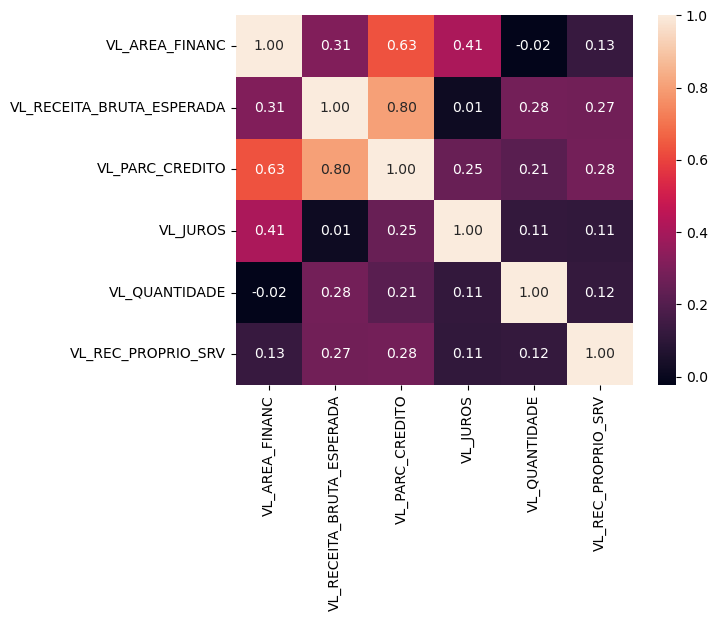

In [6]:
# sobram apenas 1487 observações se tirar os Nas

sns.heatmap(df2.corr(), annot = True, fmt = '.2f')

In [7]:
# mostrando os histogramas das variáveis

xs = ['VL_AREA_FINANC',
      'VL_RECEITA_BRUTA_ESPERADA',
      'VL_QUANTIDADE',
      'VL_REC_PROPRIO_SRV',
      'VL_JUROS']

y = 'VL_PARC_CREDITO'

fig, axes = plt.subplots(3, 2, figsize = (12,12), dpi = 720, sharey = True)

axes = axes.flatten()

for i, x in enumerate(xs): 

    sns.histplot(data = df2, x = x, ax = axes[i], bins = 20, kde = True, color = 'red')

axes[-1].axis('off')
plt.show()

In [8]:
# olhando as variáveis comparando com a variável a ser explicada

xs = ['VL_AREA_FINANC',
      'VL_RECEITA_BRUTA_ESPERADA',
      'VL_QUANTIDADE',
      'VL_REC_PROPRIO_SRV',
      'VL_JUROS']

y = 'VL_PARC_CREDITO'

# df3 = np.log(df2 + 1)

fig, axes = plt.subplots(3,2, figsize = (12,12), dpi = 720, sharey = True)

axes = axes.flatten()

for i, x in enumerate(xs): 

    sns.scatterplot(data = df2 ,x = x, y = y, ax = axes[i], color = 'Teal')
    
axes[-1].axis('off')

plt.show()

# Detectando e removendo outliers

Para remoção de pontos extremos foram aplicadas as técnicas apresentadas no livro An Introduction to Statistical Learning. Para os outliers, foi calculado o resíduo dividido pelo desvio padrão estimado (resíduos de student) e para as variáveis explicativas foi calculada a alavancagem desses pontos. 

In [9]:
# Definindo as variáveis 

Y = df2['VL_PARC_CREDITO']

X = df2[['VL_AREA_FINANC',
         'VL_RECEITA_BRUTA_ESPERADA',
         'VL_QUANTIDADE',
         'VL_REC_PROPRIO_SRV',
         'VL_JUROS']]

X = sm.add_constant(X)

In [10]:
# Estimando o modelo para depois detectar os outliers e pontos de alta alavancagem

model = sm.OLS(Y,X)

model = model.fit()

influencia = model.get_influence()

In [11]:
# encontrando os outliers 

df2[influencia.resid_studentized < 2].head()

,VL_AREA_FINANC,VL_RECEITA_BRUTA_ESPERADA,VL_PARC_CREDITO,VL_JUROS,VL_QUANTIDADE,VL_REC_PROPRIO_SRV
1906,0.29,28731.75,7754.33,4.0,2175.0,15231.07
2989,0.06,100278.00,17181.03,6.0,16200.0,0.00
5229,0.90,59899.50,20936.07,4.0,4050.0,26983.53
5813,1.49,200880.00,45240.96,4.0,13500.0,0.00
6709,1.00,63855.00,30669.98,4.0,5500.0,20414.02


In [12]:
# Encontrando os pontos de alta alavancagem

leverage = influencia.hat_matrix_diag
limite = 2*X.shape[1]/X.shape[0]
df2[leverage < limite].head()

,VL_AREA_FINANC,VL_RECEITA_BRUTA_ESPERADA,VL_PARC_CREDITO,VL_JUROS,VL_QUANTIDADE,VL_REC_PROPRIO_SRV
1906,0.29,28731.75,7754.33,4.0,2175.0,15231.07
2989,0.06,100278.00,17181.03,6.0,16200.0,0.00
5229,0.90,59899.50,20936.07,4.0,4050.0,26983.53
5813,1.49,200880.00,45240.96,4.0,13500.0,0.00
6709,1.00,63855.00,30669.98,4.0,5500.0,20414.02


# Resultados do primeiro modelo

In [13]:
#### estimando o novo modelo

# definindo o dataframe

df3 = df2[(leverage < limite) | (influencia.resid_studentized < 2)]

df3.shape

(1474, 6)

In [14]:
# definindo as variáveis

Y = df3['VL_PARC_CREDITO']

X = df3[['VL_AREA_FINANC',
         'VL_RECEITA_BRUTA_ESPERADA',
         'VL_QUANTIDADE',
         'VL_REC_PROPRIO_SRV',
         'VL_JUROS']]

X = sm.add_constant(X)

# estimando o modelo

model = sm.OLS(Y,X)

model = model.fit(cov_type = 'HC1')

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        VL_PARC_CREDITO   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     1198.
Date:                Wed, 18 Jun 2025   Prob (F-statistic):               0.00
Time:                        16:38:26   Log-Likelihood:                -16549.
No. Observations:                1474   AIC:                         3.311e+04
Df Residuals:                    1468   BIC:                         3.314e+04
Df Model:                           5                                         
Covariance Type:                  HC1                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -7283.9086   2037.307     -3.575      0.000   -1.13e+04   -3290.861
VL_AREA_FINANC             2277.1065     98.964     23.009      0.000    2083.140    2471.073
VL_RECEITA_BRUTA_ESPERADA     0.2549      0.015     16.923      0.000       0.225       0.284
VL_QUANTIDADE                 0.0318      0.012      2.746      0.006       0.009       0.054
VL_REC_PROPRIO_SRV            0.1228      0.055      2.222      0.026       0.014       0.231
VL_JUROS                   2885.4042    426.889      6.759      0.000    2048.717    3722.091
==============================================================================
Omnibus:                      304.743   Durbin-Watson:                   1.712
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8272.215
Skew:                           0.237   Prob(JB):                         0.00
Kurtosis:                      14.596   Cond. No.                     6.80e+05
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 6.8e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

O teste de Jarque-Bera possui valor muito elevado, o que indica que os resíduos não seguem uma distribuição normal. Portanto, a interpretação dos coeficientes obtidos deve ser limitada. Além disso, o teste de Breusch-Pagan indica que também há heteroscedasticidade no erro da regressão. 

In [15]:
from statsmodels.stats.diagnostic import het_breuschpagan

residuals = model.resid
exog = model.model.exog

bp_test = het_breuschpagan(residuals, exog)

labels = ['LM statistic','LM p-value', 'F statistic','F p-value']

dict(zip(labels, bp_test))

{'LM statistic': 438.51052813251,
 'LM p-value': 1.4770843109521041e-92,
 'F statistic': 124.33413816126217,
 'F p-value': 6.731520350979224e-110}

# Testando um modelo com apenas a Receita Bruta Esperada

In [16]:
df2 = df[['VL_PARC_CREDITO','VL_RECEITA_BRUTA_ESPERADA']]
df2 = df2.dropna()
X = np.log(df2['VL_RECEITA_BRUTA_ESPERADA'] + 1)
X = sm.add_constant(X)
Y = np.log(df2['VL_PARC_CREDITO'] + 1)
model = sm.OLS(Y,X)
model = model.fit()
influencia = model.get_influence()
leverage = influencia.hat_matrix_diag
limite = 2*X.shape[1]/X.shape[0]
df2 = df2[(leverage < limite) | (influencia.resid_studentized < 2)]

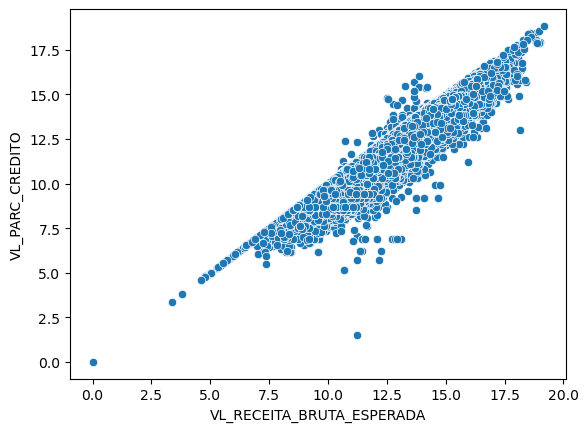

In [17]:
X = np.log(df2['VL_RECEITA_BRUTA_ESPERADA'] + 1)

X = sm.add_constant(X)

Y = np.log(df2['VL_PARC_CREDITO'] + 1)

sns.scatterplot(y = Y, x = X.iloc[:,1])
plt.show()

In [21]:
model = sm.OLS(Y,X)

model = model.fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        VL_PARC_CREDITO   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                 1.269e+07
Date:                Wed, 18 Jun 2025   Prob (F-statistic):               0.00
Time:                        16:22:35   Log-Likelihood:            -5.1919e+05
No. Observations:             1096162   AIC:                         1.038e+06
Df Residuals:                 1096160   BIC:                         1.038e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.3037      0.003    -93.574      0.000      -0.310      -0.297
VL_RECEITA_BRUTA_ESPERADA     0.9675      0.000   3562.908      0.000       0.967       0.968
==============================================================================
Omnibus:                   320832.643   Durbin-Watson:                   1.699
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1119346.250
Skew:                          -1.464   Prob(JB):                         0.00
Kurtosis:                       6.992   Cond. No.                         105.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Uma regressão usando apenas o logaritmo da receita esperada oferece um bom resultado